In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
df=pd.read_csv('D:/DSData/Advertising.csv')

In [2]:
#Checking for any null values
print(df.isnull().any())

Unnamed: 0    False
TV            False
radio         False
newspaper     False
sales         False
dtype: bool


In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Univariate Analysis

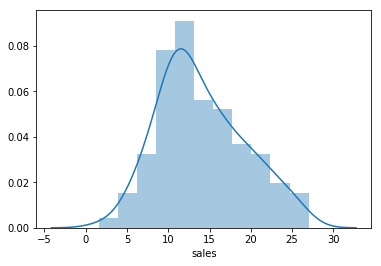

In [7]:
sns.distplot(df['sales'])
plt.show()

In [8]:
df.TV.value_counts().head()

197.6    2
237.4    2
177.0    2
76.4     2
222.4    2
Name: TV, dtype: int64

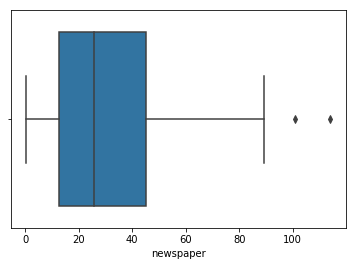

In [11]:
sns.boxplot(df['newspaper'])
plt.show()

# Bivariate Analysis

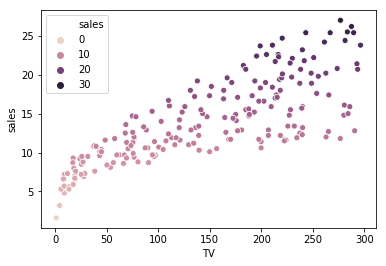

In [13]:
sns.scatterplot(x='TV', y='sales', hue='sales', data=df)

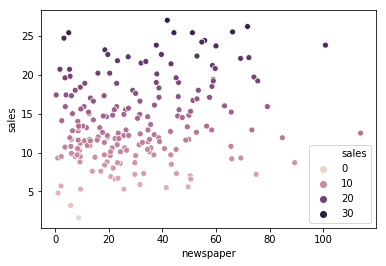

In [14]:
sns.scatterplot(x='newspaper', y='sales', hue='sales', data=df)

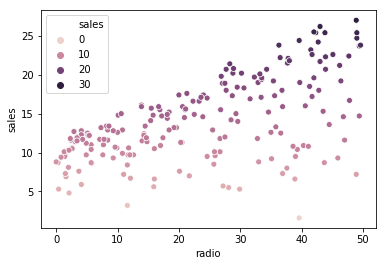

In [15]:
sns.scatterplot(x='radio', y='sales', hue='sales', data=df)

In [16]:
#radio associated with highest average sales
df.groupby(['radio']).agg({'sales': 'mean'}).sort_values(by= 'sales', ascending = False).head()

,sales
radio,
43.8,25.40
42.3,25.40
49.0,25.05
42.7,24.20
43.0,23.95


In [17]:
#TV associated with highest average sales
df.groupby(['TV']).agg({'sales': 'mean'}).sort_values(by= 'sales', ascending = False).head()

,sales
TV,
276.9,27.0
287.6,26.2
283.6,25.5
289.7,25.4
266.9,25.4


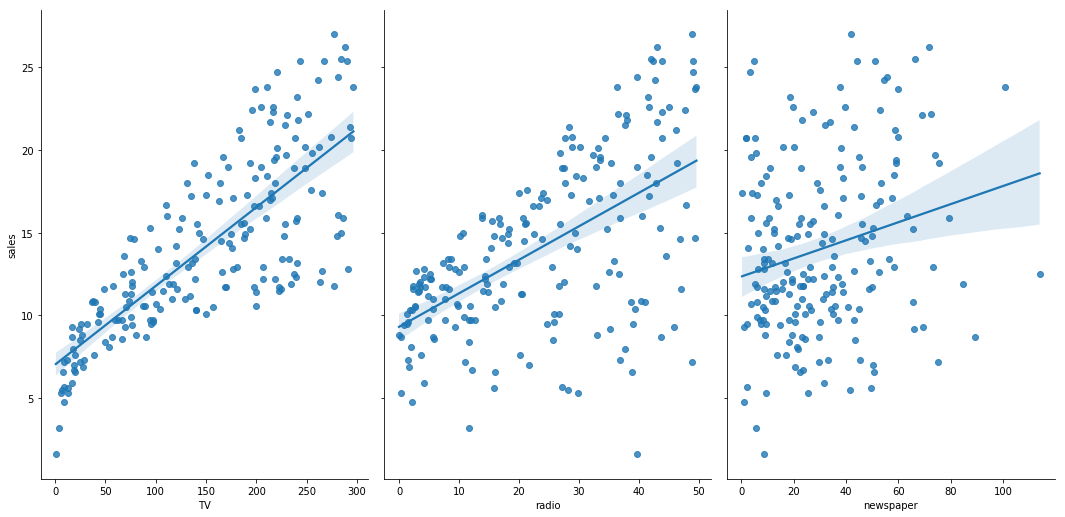

In [23]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

# Heatmap

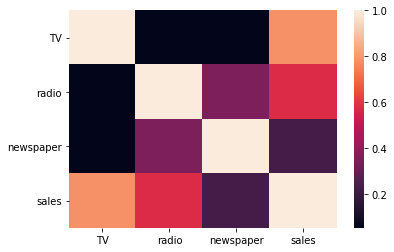

In [27]:
df=df.drop(['Unnamed: 0'], axis=1)
heat_map = sns.heatmap(df.corr())

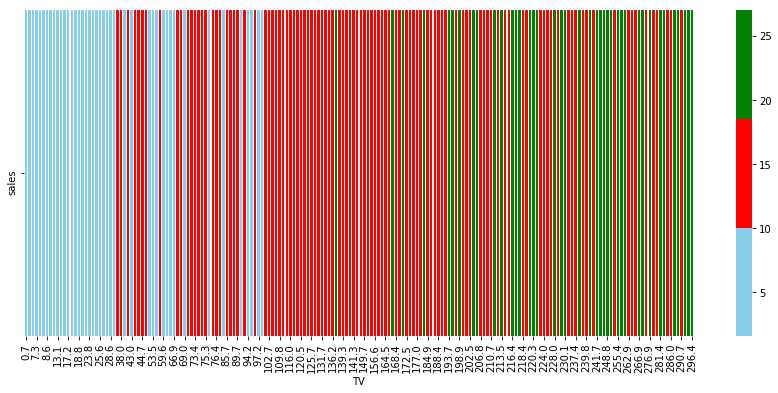

In [30]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(df,columns='TV',values=["sales"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

# Removing outliers

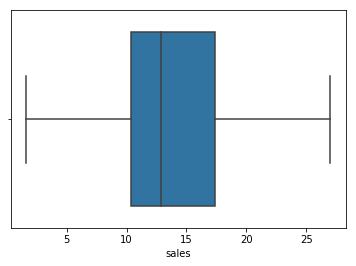

In [31]:
sns.boxplot(df['sales'])

In [32]:
from scipy import stats
z = np.abs(stats.zscore(df))
df1 = df[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

In [33]:
df.shape

(200, 4)

In [34]:
df1.shape

(198, 4)

# Modeling

In [35]:
X=df1.iloc[:,1:4].values
y=df1['sales'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
#print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-1.0658141036401503e-14
[3.88687422e-17 5.88168595e-17 1.00000000e+00]


In [39]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [40]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [41]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [42]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [43]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [44]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0757597073506817e-14


In [45]:
# removing 'radio' and checking rmse
feature_cols = ['TV', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.352056334433862


In [46]:
# removing 'newspaper' and checking rmse
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [47]:
# removing 'TV' and checking rmse
feature_cols = ['radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.7486974974677265


In [53]:
import pickle
saved_model = pickle.dumps(LinearRegression) 